## 1. Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info:\n")
df.info()
print(df.describe())

Shape of the dataset: (323268, 8)

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323268 entries, 0 to 323267
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      323268 non-null  object
 1   Country_code       321904 non-null  object
 2   Country            323268 non-null  object
 3   WHO_region         323268 non-null  object
 4   New_cases          323268 non-null  int64 
 5   Cumulative_cases   323268 non-null  int64 
 6   New_deaths         323268 non-null  int64 
 7   Cumulative_deaths  323268 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.7+ MB
          New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  3.232680e+05      3.232680e+05  323268.000000       3.232680e+05
mean   2.384633e+03      1.472605e+06      21.528008       1.805220e+04
std    3.920838e+04      6.720642e+06     149.018945       7.566745e+04
min   -6.507900e+04    

## 2. Cleaning

### 1. Missing Values

In [5]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': 100 * df.isnull().sum() / len(df)
}).sort_values(by='missing_percent', ascending=False)
print(missing)

                   missing_count  missing_percent
Country_code                1364         0.421941
Date_reported                  0         0.000000
Country                        0         0.000000
WHO_region                     0         0.000000
New_cases                      0         0.000000
Cumulative_cases               0         0.000000
New_deaths                     0         0.000000
Cumulative_deaths              0         0.000000



### 2. Handling Missing Values

In [16]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(0)

print("Missing Values after Cleaning:\n", df.isnull().sum())

# Convert Date column to datetime
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

Missing Values after Cleaning:
 Date_reported           0
Country_code         1364
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64


### 3. Duplicates & Datatypes

In [17]:
### 3. Duplicates & Datatypes
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after cleaning:", df.duplicated().sum())

Duplicate rows: 0
Duplicate rows after cleaning: 0


## 3. Univariate, Bivariate & Multivariate Analysis

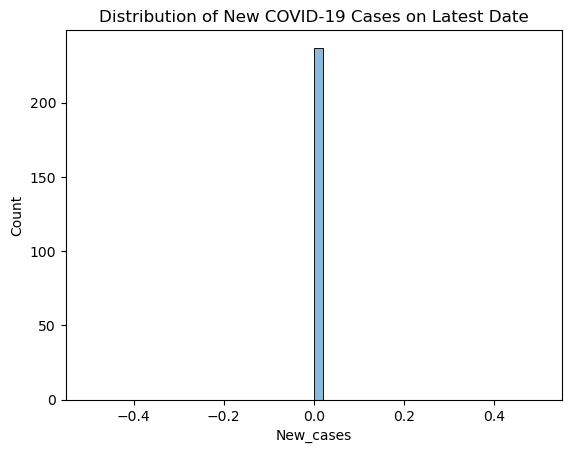

In [19]:
# Univariate Analysis - Distribution of new COVID-19 cases on the latest reporting date
latest_date = df['Date_reported'].max()
df_latest = df[df['Date_reported'] == latest_date]

sns.histplot(df_latest['New_cases'], bins=50, kde=True)  # Use 'New_cases' or check the exact column name
plt.title('Distribution of New COVID-19 Cases on Latest Date')
plt.show()

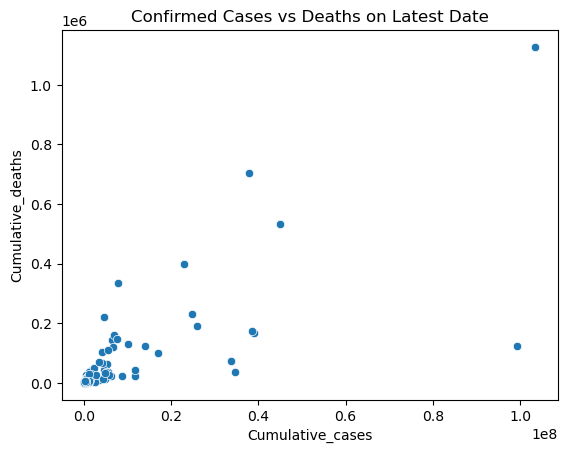

In [20]:
sns.scatterplot(x='Cumulative_cases', y='Cumulative_deaths', data=df_latest)
plt.title('Confirmed Cases vs Deaths on Latest Date')
plt.show()

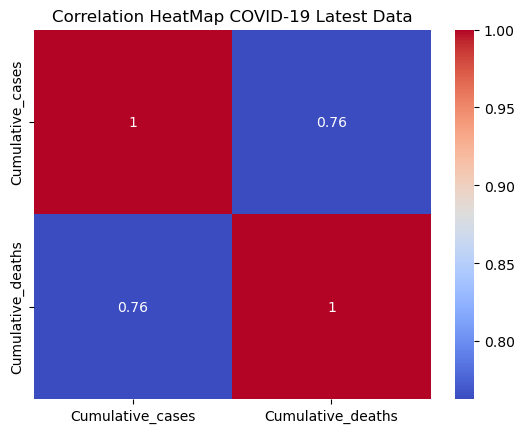

In [22]:
corr_cols = ['Cumulative_cases', 'Cumulative_deaths']
corr = df_latest[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation HeatMap COVID-19 Latest Data")
plt.show()

## 4. Outlier Detection Using IQR on Confirmed Cases

Number of outliers in Cumulative Cases: 39


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_11032\2609719284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['Cumulative_cases_capped'] = df_latest['Cumulative_cases'].clip(lower, upper)


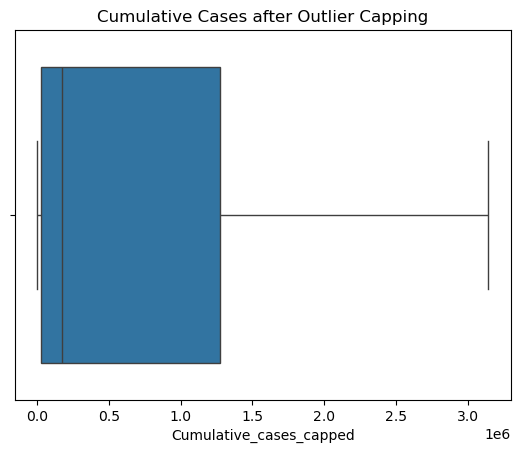

In [24]:
Q1 = df_latest['Cumulative_cases'].quantile(0.25)
Q3 = df_latest['Cumulative_cases'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df_latest[(df_latest['Cumulative_cases'] < lower) | (df_latest['Cumulative_cases'] > upper)]
print("Number of outliers in Cumulative Cases:", len(outliers))

df_latest['Cumulative_cases_capped'] = df_latest['Cumulative_cases'].clip(lower, upper)
sns.boxplot(x=df_latest['Cumulative_cases_capped'])
plt.title("Cumulative Cases after Outlier Capping")
plt.show()


## 5. Feature Engineering (Optional)
### Could generate new features: growth rate, rolling averages, etc.

## 6. Key Insights
### - Confirmed and Deaths highly correlated on latest date.
### - Data skewed with large outbreaks forming outliers.
### - Timely cleaning and outlier capping improve analysis quality.

## Export cleaned data

In [26]:
df_latest.to_csv('COVID19_latest_cleaned.csv', index=False)
print("Cleaned COVID-19 latest date data saved as COVID19_latest_cleaned.csv")

Cleaned COVID-19 latest date data saved as COVID19_latest_cleaned.csv
